### 승무원 목소리, 일반인 목소리 학습
### 어느정도의 일치율을 보이는지 분석

In [1]:
import os
from scipy.io import wavfile
import array
from pydub import AudioSegment
from pydub.utils import get_array_type
from tqdm import tqdm
import csv
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd

In [299]:
data_default_path = "C:/Users/user/desktop/data/sound_data/"

for file_path in os.listdir(data_default_path):
    print(file_path)
    s_sum = 0
    for file in os.listdir(data_default_path+file_path):
        print(file)
#         file = data_default_path+file_path+'/'+file
#         data = AudioSegment.from_file(file=file)
#         print(data.duration_seconds)
#         s_sum += data.duration_seconds 
#     print("sum : " + s_sum)

air
2019년 업데이트된 대한항공 기내방송문(전문) 한국어+영어.mp3
[승무원 영어] 기내 안내 방송문 읽기 연습! - #기내안내문 #승무원.mp3
대한항공 승무원 Q&A (키, 연봉, 면접 꿀팁 등등) #예승이 보면 이득인 영상 Double Soup.mp3
승무원들은 진짜 진상 승객 많이 만나나요 [올어바웃].mp3
신입승무원의 첫 비행에 대한이야기 About Korean Air, The First Flight of a New Cabin Crew.mp3
어서오세요, 야임항공에 (승무원 롤플레이) Korean Flight Attendant Roleplay.mp3
이스타항공 1년 차 승무원과 10년 차 승무원의 인터뷰.mp3
non_air
How you can help transform the internet into a place of trust Claire Wardle.mp3
The danger of AI is weirder than you think Janelle Shane.mp3
What I learned about freedom after escaping North Korea Yeonmi Park.mp3
Why I escaped from my brainwashed country Hyeonseo Lee TEDxKyoto.mp3
[TEDx] 흔들리지 않는 건강하고 아름다운 자존감을 세우는 법 강연 하이라이트.mp3
[책 선물 이벤트 중] 당신은 생각하는 것보다 더 강합니다 새벽 유튜버 뷰티 크리에이터 인생 희망 행복 암 극복 세바시 1108회.mp3
[책 선물 이벤트] 아름다움을 결정하는 기준은 따로 있다 양정원 필라테스 강사, 배우 필라테스 요가 건강 뷰티 세바시 1111회.mp3
인생의 바닥일수록 던져야 하는 질문 신동미 배우 인생 행복 자존감 동상이몽 드라마 세바시 1075회.mp3


In [266]:
file_path = "sample_1.mp3"
file_path = "C:/Users/user/desktop/data/sound_data/air/신입승무원의 첫 비행에 대한이야기 About Korean Air, The First Flight of a New Cabin Crew.mp3"
sample = AudioSegment.from_file(file=file_path,frame_rate=16000)

In [212]:
sample._spawn(sample1.raw_data,overrides={'frame_rate':44100*1.02})

In [182]:
sample.frame_rate

44100

In [109]:
sample2 = AudioSegment.from_file("sample_2.mp3")

In [258]:
len(sample)

151417

In [257]:
len(sample2)

39706

In [2]:
# sample(load_file) -> sound(array)

def file_to_sound(sample):
    left = sample.split_to_mono()[0]
    bit_depth = left.sample_width*8
    array_type = get_array_type(bit_depth)
    numeric_array = array.array(array_type, left._data)
    sound = np.array(numeric_array)
    return sound

In [225]:
a = sample1[1000].raw_data

In [236]:
a[2]

153

In [ ]:
sample1.sample

In [282]:
a =sample1._spawn(sample1.raw_data,overrides={'frame_rate':100000})

In [ ]:
plt.plot(a[0:44100])

In [280]:
a = file_to_sound(sample1)


In [283]:
len(a)

4410

In [286]:
a = file_to_sound(a)

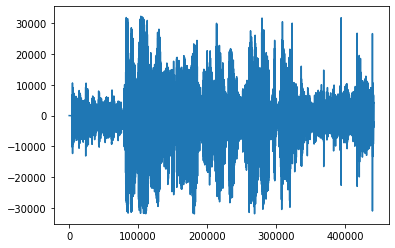

In [287]:
plt.plot(a)

In [288]:
len(a)

441000

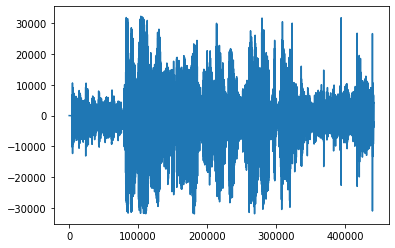

In [274]:
import matplotlib.pyplot as plt
plt.plot(a)

In [259]:
len(sample1)

10000

In [3]:
# sound(array) -> features
def feature_extract_save(y,sr,save_file=None,label="Unknown"):
    data_directory = "C:/Users/user/desktop/data/"
    # 한줄 생성
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = [np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(chroma_stft)]    
    for e in mfcc:
        to_append.append(np.mean(e))
    to_append.append(label)
    
    # 저장유무체크 
    if save_file == False or save_file == None:
        pass
    else:
        # header생성
        if save_file == True:
            save_file = data_directory +'air.csv'
        header = ['spec_cent','spec_bw','rolloff','zcr','chroma_stft']
        for i in range(20):
            header.append(f'mfcc{i}')
        header.append('label')
        
        # 파일유무체크
        if not os.path.exists(save_file):
            with open(save_file,'w',newline='') as f:
                writer = csv.writer(f)
                writer.writerow(header)

        with open(save_file, 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(to_append)
            
    return np.array(to_append[0:-1])

In [150]:
file = "C:/Users/user/desktop/data/sound_data/air/2019년 업데이트된 대한항공 기내방송문(전문) 한국어+영어.mp3"

In [151]:
data = AudioSegment.from_file(file)

In [147]:
len(data)

310033

In [152]:
sound = file_to_sound(data)

In [153]:
sound.max()

22371

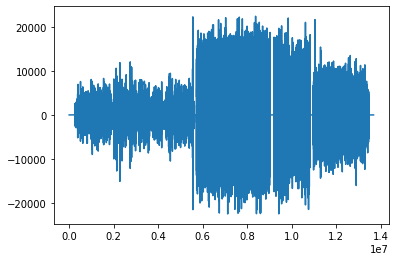

In [115]:
plt.plot(sound)

In [154]:
len(sound)//44100

310

In [155]:
len(sound)

13672448

In [134]:
feature_extract_save(sound[44100*10:44100*20]/(2**15-1),44100)

array([ 1.28820388e+03,  2.08537167e+03,  2.43817311e+03,  2.62499320e-02,
        4.72258598e-01, -3.70523376e+02,  1.92731400e+02, -1.44420176e+01,
        2.23815804e+01,  1.19701300e+01,  2.72006817e+01,  4.92373800e+00,
        5.42499828e+00,  9.28487110e+00,  1.02518301e+01, -2.93525338e+00,
        5.99333227e-01,  2.50305009e+00,  3.95577145e+00,  5.55148315e+00,
       -2.17201400e+00, -1.28242731e+00, -3.72752976e+00,  5.25772721e-02,
       -5.97927618e+00])

In [ ]:
# 위치 체크하기
알고리즘체크

In [ ]:
sound = file_to_sound(data)
part = int((data.duration_seconds)/60)
print(part)
for i in tqdm(range(0,44100*(part),44100)):
    features = feature_extract_save(sound[i:i+1]/(2**15-1),44100,True,file)

In [178]:
# feature 추출 후 air.csv로 저장
sound_data_path = "C:/Users/user/desktop/data/sound_data/"

for file_path in os.listdir(sound_data_path):
    print(file_path)
    for file in (os.listdir(sound_data_path+file_path)):
        print("file: ",file)
        file = sound_data_path+file_path+'/'+file
        data = AudioSegment.from_file(file=file)
        sound = file_to_sound(data)
        for seconds in [15]:
            print("seconds: ",seconds," offset: ",end=' ')
            if file_path =='non_air': gap = 15
            else: gap = 7
            for offset in (range(2,15,gap)):
                print(offset,end=' ')
                part = int((data.duration_seconds-offset)/seconds)
                for i in (range(part)):
                    features = feature_extract_save(sound[44100*(offset+seconds*i):44100*(offset+seconds*(i+1))]/(2**15-1),44100,True,file_path)
            print()

air
file:  2019년 업데이트된 대한항공 기내방송문(전문) 한국어+영어.mp3
seconds:  15  offset:  2 9 
file:  [승무원 영어] 기내 안내 방송문 읽기 연습! - #기내안내문 #승무원.mp3
seconds:  15  offset:  2 9 
file:  대한항공 승무원 Q&A (키, 연봉, 면접 꿀팁 등등) #예승이 보면 이득인 영상 Double Soup.mp3
seconds:  15  offset:  2 9 
file:  승무원들은 진짜 진상 승객 많이 만나나요 [올어바웃].mp3
seconds:  15  offset:  2 9 
file:  신입승무원의 첫 비행에 대한이야기 About Korean Air, The First Flight of a New Cabin Crew.mp3
seconds:  15  offset:  2 9 
file:  어서오세요, 야임항공에 (승무원 롤플레이) Korean Flight Attendant Roleplay.mp3
seconds:  15  offset:  2 9 
file:  이스타항공 1년 차 승무원과 10년 차 승무원의 인터뷰.mp3
seconds:  15  offset:  2 9 
non_air
file:  How you can help transform the internet into a place of trust Claire Wardle.mp3
seconds:  15  offset:  2 
file:  The danger of AI is weirder than you think Janelle Shane.mp3
seconds:  15  offset:  2 
file:  What I learned about freedom after escaping North Korea Yeonmi Park.mp3
seconds:  15  offset:  2 
file:  Why I escaped from my brainwashed country Hyeonseo Lee TEDxKyoto.mp3
sec

In [4]:
import pandas as pd
from keras import models,layers
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import keras



# csv_data = 'C:/Users/user/desktop/sound_data/attendence/attend.csv'
def data_preprocessing(csv_data):
    data = pd.read_csv(csv_data,encoding='euc-kr')

    person_label = data[['label']]
    onehotencoder = OneHotEncoder()
    y = onehotencoder.fit_transform(person_label).toarray()
    
    # normalizing
    scaler = StandardScaler()
    X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
    return X,y,onehotencoder

def one_hot_decoder(oh_encoder,y):
    return oh_encoder.categories_[0][np.argmax(y,axis=1)].reshape(-1,1)

# spliting of dataset into train and test dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def model_making(input_shape,output_len):
    # creating a model
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(input_shape[1:]) ))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(output_len, activation='softmax'))

    model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
    
    return model

def model_making2(input_shape,output_len):
    # creating a model
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(input_shape[1:]) ))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dense(output_len, activation='softmax'))

    
    model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
    
    return model

def ML_model_making(X,y):
    MLmodel = GradientBoostingClassifier()
    MLmodel.fit(X,y)
    return MLmodel

def model_fitting(model,X,y):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    
#     history = model.fit(X, y, epochs=30, batch_size=128)
    history = model.fit(X_train, y_train, epochs=20, batch_size=128)
    
    test_loss, test_acc = model.evaluate(X_test,y_test)
    print('test_acc: ',test_acc)
    return model,history
    
def model_predict(model,X):

    # predictions
    predictions = model.predict(X)

    return predictions

Using TensorFlow backend.


In [5]:
def MLmodel():
    csv_data = 'C:/Users/user/desktop/sound_data/attendence/attend.csv'
    X,y,oh_encoder = data_preprocessing(csv_data)
    y = one_hot_decoder(oh_encoder,y)
    return ML_model_making(X,y)

In [6]:
csv_data = 'C:/Users/user/desktop/data/air_backup.csv'
X,y,oh_encoder = data_preprocessing(csv_data)
a = one_hot_decoder(oh_encoder,y)
score = []
for i in (range(100)):
    X_train,X_test,y_train,y_test=train_test_split(X,a[:,0])
    MLmodel = ML_model_making(X_train,y_train)
    score.append(MLmodel.score(X_test,y_test))
np.mean(score)

0.9953110047846888

In [6]:
csv_data = 'C:/Users/user/desktop/data/air_final.csv'
df = pd.read_csv(csv_data)

In [7]:
np.bincount(df['label']=='air')

array([429, 411], dtype=int64)

## 승무원들 목소리만 정규화

In [28]:
df_air

,spec_cent,spec_bw,rolloff,zcr,chroma_stft,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
0,913.718696,1543.809463,1740.239477,0.017150,0.376406,-465.08330,144.41014,-9.829946,18.128386,10.030589,...,1.420995,1.865756,1.785952,2.986183,-2.072179,-1.324863,-3.462620,-0.537498,-4.473238,air
1,1264.840873,2002.883825,2359.735731,0.027087,0.490890,-366.78357,195.29306,-15.089975,19.255026,13.273350,...,0.171022,1.614786,3.096177,4.404872,-2.822102,-1.353390,-2.403789,0.603947,-3.397971,air
2,1200.402135,1990.296408,2238.636463,0.024009,0.508702,-363.53976,192.61220,-11.329023,23.030390,21.430140,...,-0.600049,-1.787281,0.267164,0.082130,-3.847717,-0.820367,-0.968974,-0.318407,-3.817681,air
3,1173.126672,1957.000725,2107.253924,0.024794,0.492149,-360.19077,191.45421,-3.322106,18.500967,22.702509,...,-2.043706,-0.919662,2.048093,0.616278,-4.028528,-0.467494,1.167214,-0.779062,-4.620779,air
4,1333.718738,2144.236366,2519.751430,0.025989,0.498055,-351.95480,186.65797,-6.029542,24.040827,17.618809,...,-1.774459,-0.191760,0.331936,1.329665,-4.159784,-0.487660,0.813960,-0.767067,-5.519193,air
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2060.895637,3026.022273,4419.889940,0.033093,0.402749,-227.86363,142.73549,12.107197,40.140438,-7.977985,...,0.957403,4.099817,0.287679,4.212749,1.230150,5.626254,-0.527118,0.296745,0.160901,air
407,2297.268345,3146.036026,5053.886107,0.038661,0.394597,-195.39370,146.47269,0.419505,43.734497,-15.178566,...,0.453256,1.097618,-1.414757,4.302560,-2.901138,4.792876,-1.270335,-1.261760,-1.158849,air
408,2471.403270,3322.475309,5464.250292,0.045352,0.425776,-198.68385,141.01712,0.917839,35.872807,-12.740496,...,2.475155,0.141880,-0.086030,4.652483,-0.769627,4.696950,-4.330089,-0.840979,-0.699859,air
409,2352.615340,3204.894397,5118.119051,0.040378,0.389510,-187.41617,148.36914,-1.898656,41.347954,-16.489225,...,-0.675242,1.052441,-1.091222,4.725918,-3.181732,2.913548,-5.432674,-2.391018,-1.244784,air


In [34]:
aa.mean()

-1.1755938207223068e-15

In [30]:
aa = std.fit_transform(df_air[['chroma_stft']])

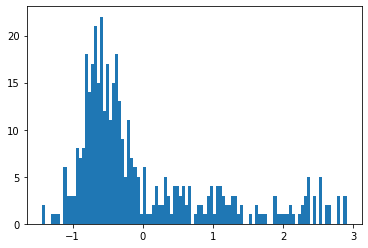

In [31]:
plt.hist(aa,bins=100)
plt.show()

In [ ]:
std.fit(df_air.iloc[:,])

In [8]:
df_air = df[df['label']=='air']
df_non = df[df['label']=='non_air']

std = StandardScaler()
std.fit(df_air.iloc[:,:-1])

a = std.transform(df_air.iloc[:,:-1])
b = std.transform(df_non.iloc[:,:-1])

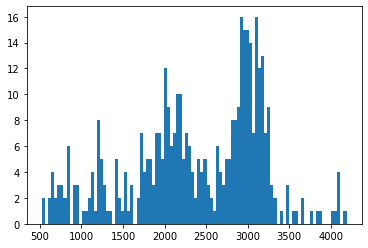

In [69]:
plt.hist(df_air['spec_cent'],bins=100)
plt.show()

In [71]:
a.shape

(411, 25)

In [73]:
import statistics

for i in range(a.shape[1]):
    print(i,'=',statistics.median(a[:,i]))

0 = 0.11208027708554127
1 = 0.22310123393172548
2 = 0.12649565368519813
3 = 0.1562851723455493
4 = -0.3922838931598205
5 = -0.22026668248370448
6 = -0.30181509140419854
7 = -0.05227870369431982
8 = -0.09470131525751585
9 = 0.01583569773737619
10 = -0.14503403125048783
11 = -0.24090476966244517
12 = 0.2160156781880032
13 = -0.16795968933987088
14 = -0.2439734628553519
15 = 0.10249127986177509
16 = 0.1463605414002764
17 = 0.009031909052634146
18 = 0.147023103900934
19 = -0.09204811824859657
20 = -0.03675164662595314
21 = -0.206746755415494
22 = 0.07093430553812029
23 = 0.048333240062452654
24 = -0.1909888383271509


In [77]:
a.shape

(411, 25)

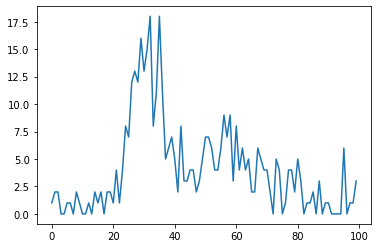

In [91]:
plt.plot(np.histogram(a[:,6],bins=100)[0])


In [112]:
def x_axis(a):
    x = []
    for i in range(len(np.histogram(a)[1])-1):
        x.append(np.histogram(a)[1][i:i+2].mean())
    return x


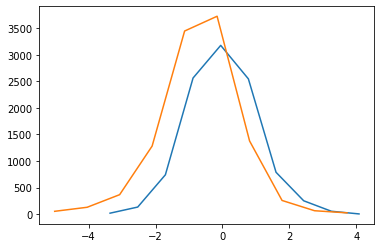

In [113]:
plt.plot(x_axis(a),np.histogram(a)[0])
plt.plot(x_axis(b),np.histogram(b)[0])

In [121]:
a.shape

(411, 25)

In [140]:
a[:,21:].shape

(411, 4)

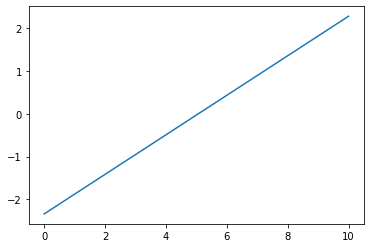

In [157]:
plt.plot(np.histogramdd(a[:,0],bins=10)[1][0])
plt.show()

In [156]:
np.histogramdd(a[:,0],bins=10)

(array([ 24.,  28.,  21.,  45.,  76.,  35., 102.,  63.,   8.,   9.]),
 [array([-2.34072137, -1.87879725, -1.41687313, -0.95494901, -0.49302489,
         -0.03110076,  0.43082336,  0.89274748,  1.3546716 ,  1.81659572,
          2.27851984])])

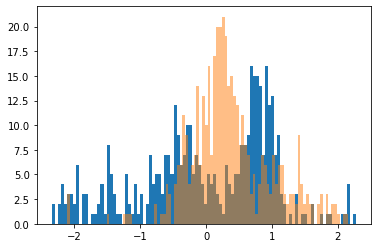

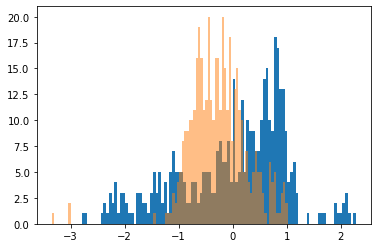

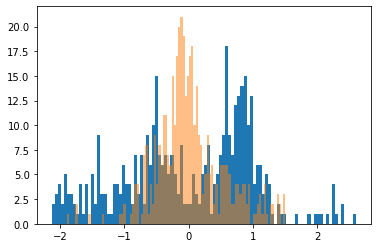

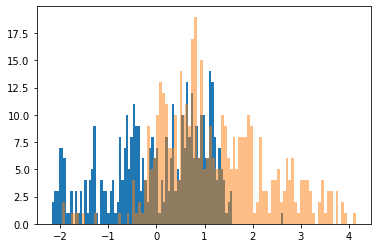

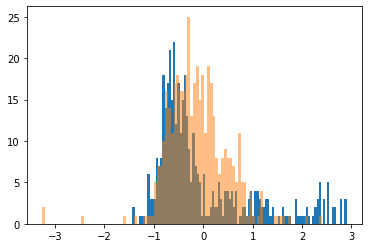

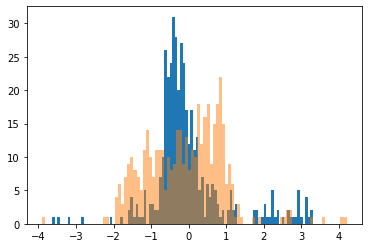

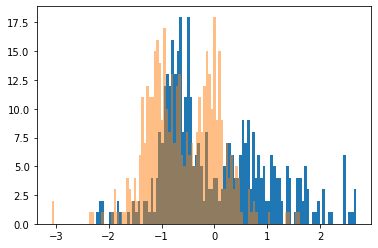

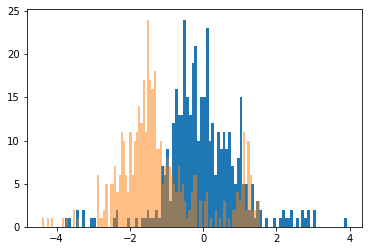

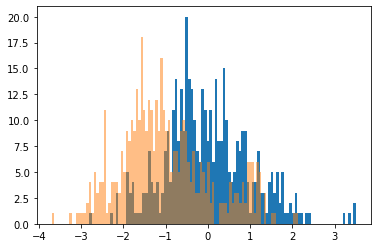

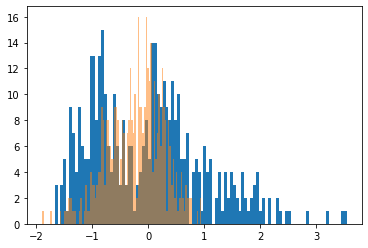

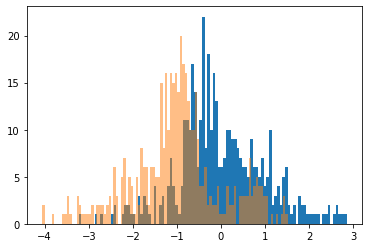

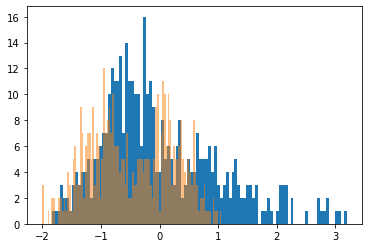

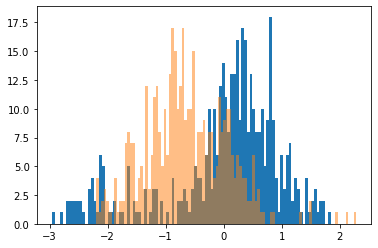

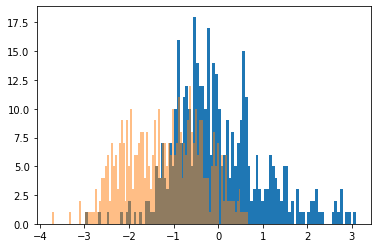

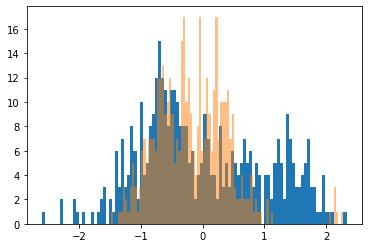

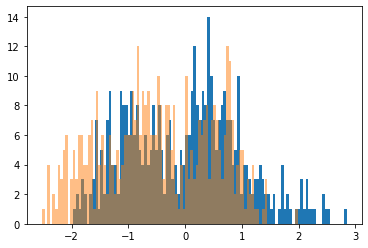

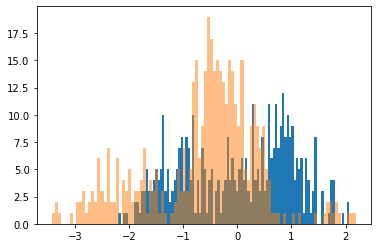

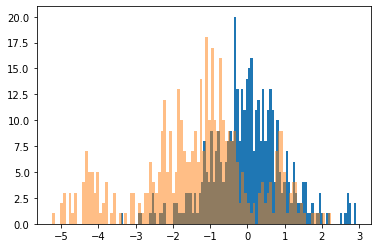

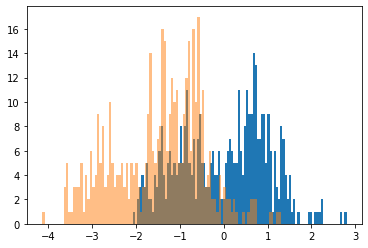

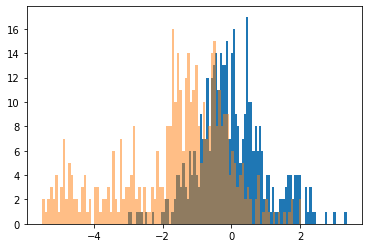

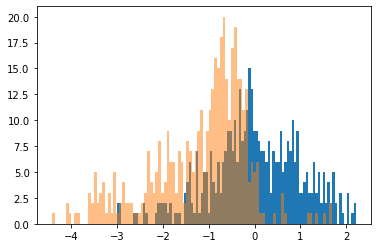

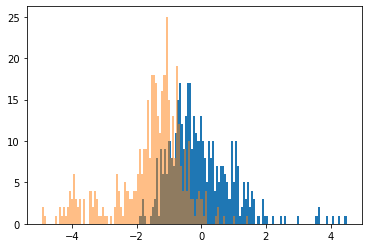

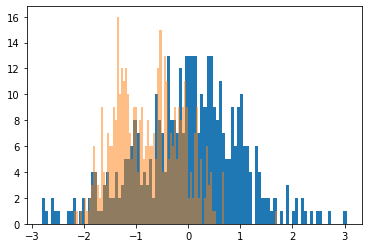

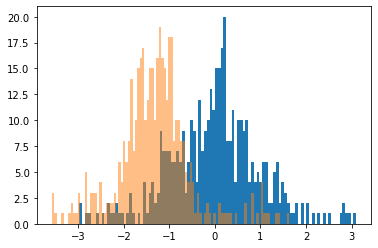

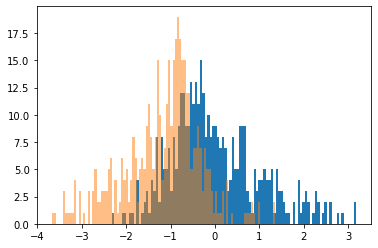

In [67]:
for i in range(a.shape[1]):
    plt.hist(a[:,i],bins=100)
    plt.hist(b[:,i],bins=100,alpha = 0.5)
    plt.show()

In [10]:
a_b = np.concatenate((a,b))

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(a_b,df_air['label'])
a_pca = pca.transform(a)
b_pca = pca.transform(b)

## 데이터 읽어서,
> feature 추출  
> std.transform  
> pca.trnsform  
> 분석

In [17]:
file = "sample_1.mp3"
data = AudioSegment.from_file(file)
sound = file_to_sound(data)
# features = feature_extract_save(sound/(2**15-1),44100,save_file="C:/Users/user/desktop/data/test.csv",label="sample")
features = feature_extract_save(sound/(2**15-1),44100,save_file=False,label="sample")

In [18]:
std_sample = std.transform(features[np.newaxis,])
pca_sample = pca.transform(std_sample)

In [29]:
similarity_std = 1-abs(np.round(norm.cdf(std_sample)-0.5,3))*2
similarity_pca = 1-abs(np.round(norm.cdf(pca_sample)-0.5,3))*2

In [31]:
similarity_std = 1-abs(np.round(norm.cdf(b)-0.5,3))*2
similarity_pca = 1-abs(np.round(norm.cdf(b_pca)-0.5,3))*2

In [21]:
similarity_pca[0].mean()

0.29044444444444445

In [32]:
similarity_pca.mean(),similarity_std.mean()

(0.419969437969438, 0.4430021445221445)

In [196]:
similarity_pca.mean(axis = 0),similarity_std.mean(axis=0)

(array([0.16804662, 0.27117949, 0.25289977, 0.42378555, 0.53310956,
        0.40032168, 0.55151981, 0.47910956, 0.69975758]),
 array([0.63488112, 0.66942657, 0.71950117, 0.36558042, 0.66726807,
        0.48647086, 0.535669  , 0.22327273, 0.29521678, 0.6920373 ,
        0.32734732, 0.54095571, 0.49237762, 0.33892774, 0.65218648,
        0.43664802, 0.51844755, 0.26450816, 0.26268531, 0.29172028,
        0.37379487, 0.25065268, 0.47070396, 0.23226573, 0.33250816]))

In [111]:
norm.pdf(0)

0.3989422804014327

In [374]:
np.random.norma(0,1)

array([6.13455820e+05, 4.30831353e+05, 3.59080792e+06, 3.54627464e-04,
       7.05157898e-03, 4.14083916e+03, 9.79502357e+02, 2.46996167e+02,
       1.29301039e+02, 1.89336285e+02, 4.96484873e+01, 8.09175164e+01,
       7.27870074e+01, 1.86747484e+01, 5.97248963e+01, 2.06933852e+01,
       1.85715135e+01, 1.10154524e+01, 1.81991784e+01, 7.94930582e+00,
       8.73248233e+00, 7.82606535e+00, 9.52992860e+00, 9.97411717e+00,
       7.29251945e+00])

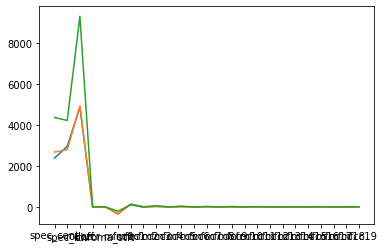

In [369]:
plt.plot(std.a)
plt.plot(features)

In [352]:
abs(std_sample).mean()

1.6163616746079696

In [354]:
abs(pca_sample).mean()

2.483457224323838

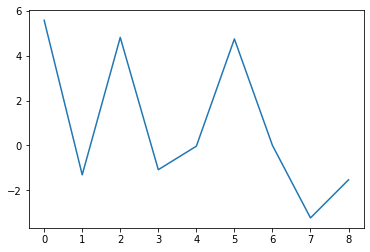

In [350]:
plt.plot(pca_sample.T)
plt.show()

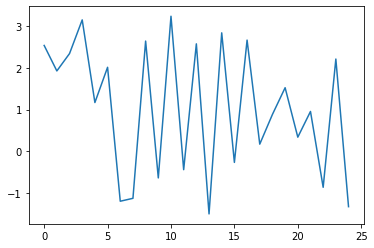

In [349]:
plt.plot(std_sample.T)
plt.show()

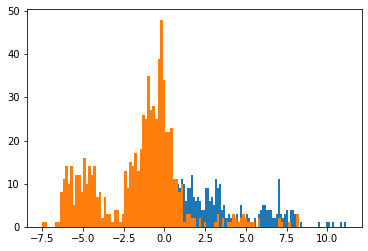

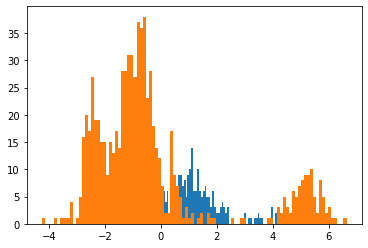

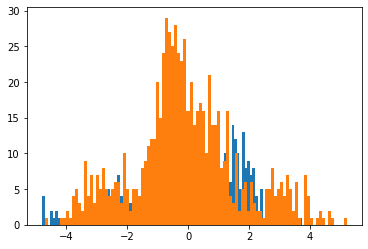

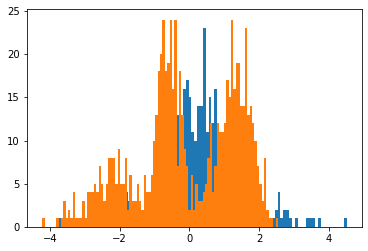

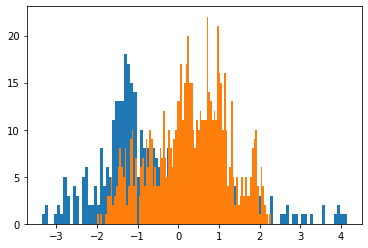

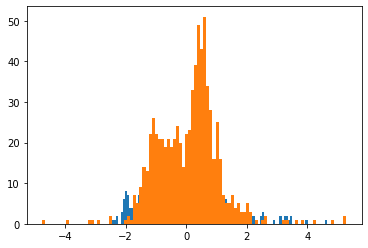

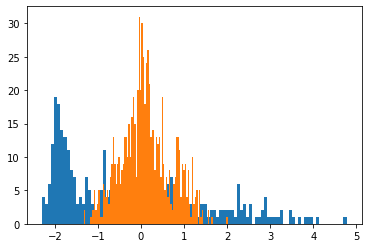

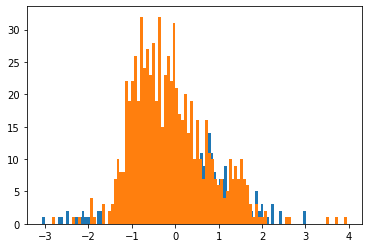

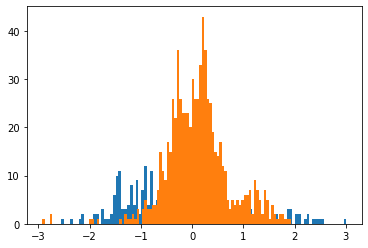

In [323]:
for i in range(a_pca.shape[1]):
    plt.hist(a_pca[:,i],bins=100)
    plt.hist(b_pca[:,i],bins=100)
    plt.show()

In [314]:
pca.explained_variance_ratio_.cumsum()

array([0.39957352, 0.55613755, 0.66424793, 0.72944498, 0.77929476,
       0.82404063, 0.86112376, 0.89083708, 0.91065403])

In [ ]:
a_b_pca

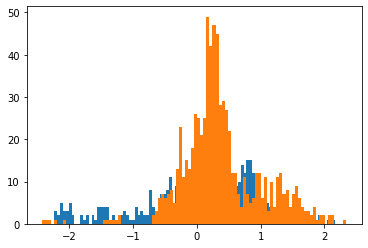

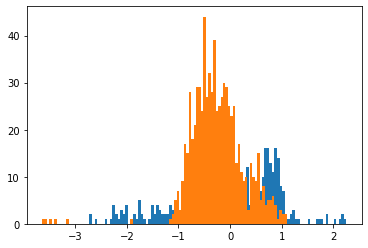

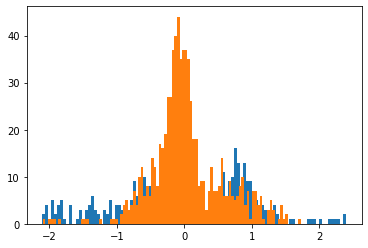

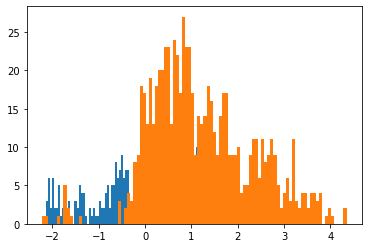

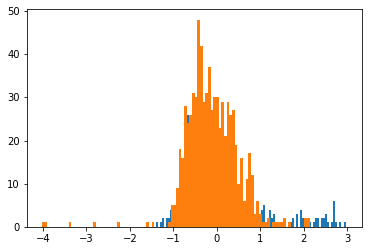

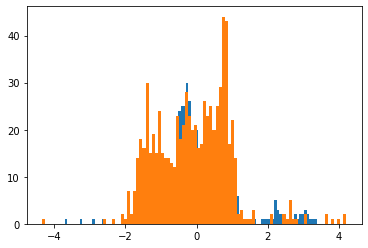

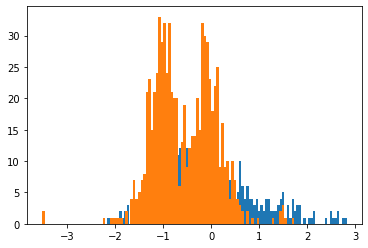

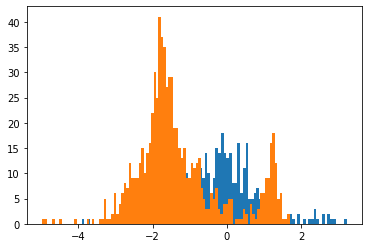

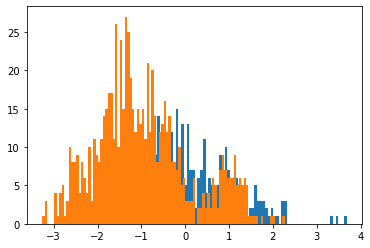

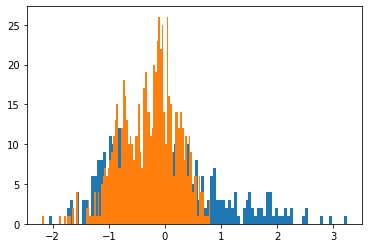

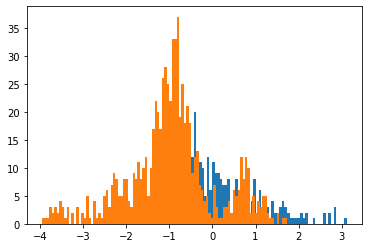

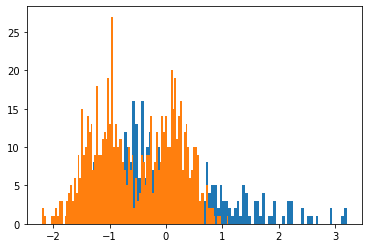

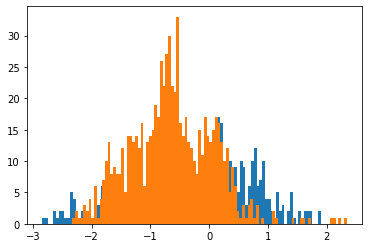

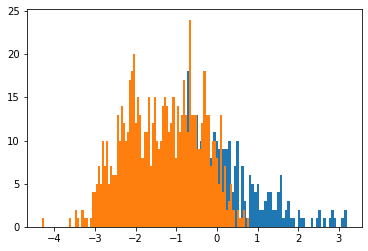

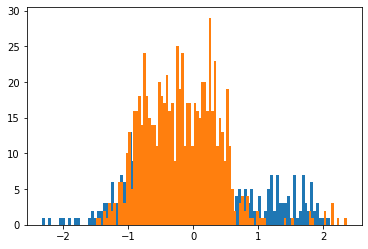

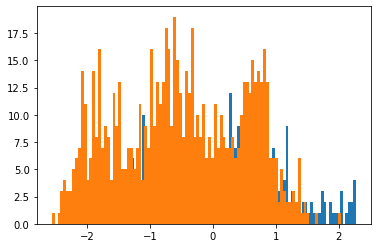

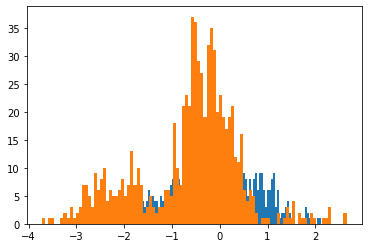

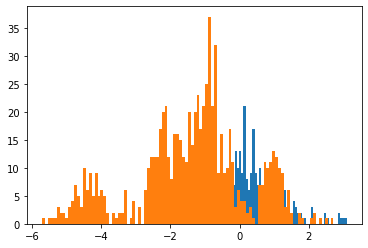

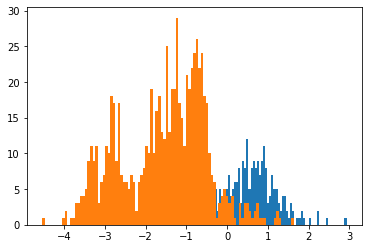

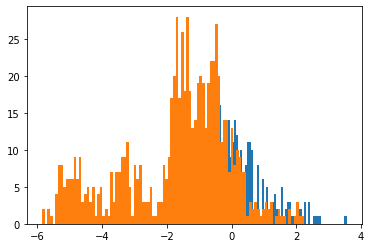

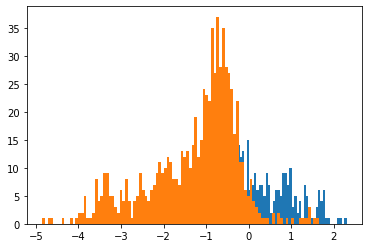

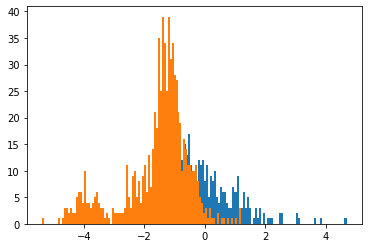

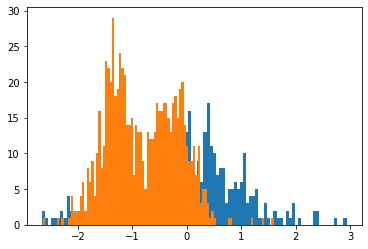

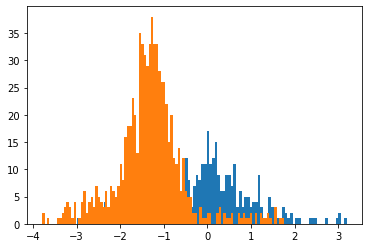

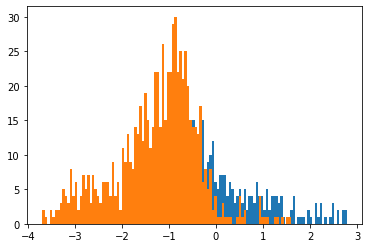

In [283]:
for i in range(a.shape[1]):
    plt.hist(a[:,i],bins=100)
    plt.hist(b[:,i],bins=100)
    plt.show()

In [52]:
MLmodel.predict([X_test[0]])

array(['air'], dtype=object)

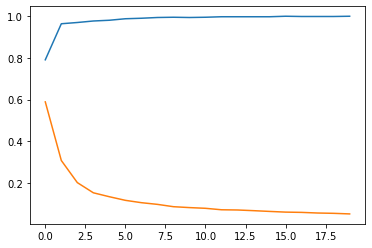

In [214]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])

In [207]:
csv_data = 'C:/Users/user/desktop/data/air.csv'
X,y,oh_encoder = data_preprocessing(csv_data)
model = model_making(X.shape,y.shape[1])
model,history = model_fitting(model,X,y)

Epoch 1/20
832/832 [==============================] - ETA: 2s - loss: 0.8054 - acc: 0.593 - 1s 631us/step - loss: 0.5888 - acc: 0.7909
Epoch 2/20
832/832 [==============================] - ETA: 0s - loss: 0.3475 - acc: 0.968 - 0s 32us/step - loss: 0.3074 - acc: 0.9639
Epoch 3/20
832/832 [==============================] - ETA: 0s - loss: 0.2042 - acc: 0.976 - 0s 34us/step - loss: 0.2011 - acc: 0.9700
Epoch 4/20
832/832 [==============================] - ETA: 0s - loss: 0.1485 - acc: 0.992 - 0s 31us/step - loss: 0.1522 - acc: 0.9772
Epoch 5/20
832/832 [==============================] - ETA: 0s - loss: 0.1433 - acc: 0.968 - 0s 29us/step - loss: 0.1333 - acc: 0.9808
Epoch 6/20
832/832 [==============================] - ETA: 0s - loss: 0.1142 - acc: 0.984 - 0s 31us/step - loss: 0.1160 - acc: 0.9880
Epoch 7/20
832/832 [==============================] - ETA: 0s - loss: 0.0914 - acc: 1.000 - 0s 29us/step - loss: 0.1048 - acc: 0.9904
Epoch 8/20
832/832 [==============================] - ETA: 0s

## 정규화,pca -> 분석

In [83]:
csv_data = 'C:/Users/user/desktop/data/air.csv'
df = pd.read_csv(csv_data)

In [84]:
std = StandardScaler()
std.fit(df.iloc[:,:-1])
a = std.transform(df.iloc[:,:-1])

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(a,df['label'])
a = pca.transform(a)

In [86]:
pca.explained_variance_ratio_.cumsum()>0.9

array([False, False, False, False, False, False, False, False,  True])

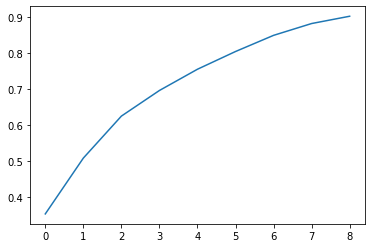

In [87]:
plt.plot(pca.explained_variance_ratio_.cumsum())

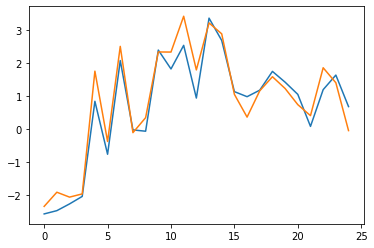

In [123]:
plt.plot(a[0])
plt.plot(a[1])

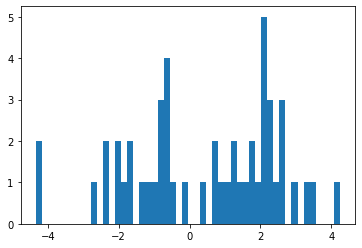

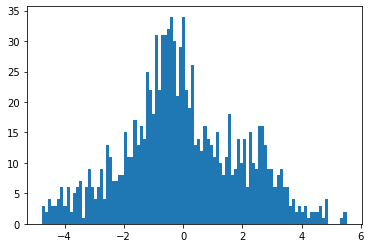

In [91]:
feature_i = 1
plt.hist(a[0:50,feature_i],bins=50)
plt.show()
plt.hist(a[50:,feature_i],bins=100)
plt.show()

In [ ]:
for i in range(a.shape[1]):
    feature_i = i
    plt.hist(a[0:50,feature_i],bins=100)
    plt.hist(a[50:,feature_i],bins=100)
    plt.show()

In [241]:
X,y,oh_encoder = data_preprocessing(csv_data)
model = model_making(a.shape,y.shape[1])
model,history = model_fitting(model,a,y)

Epoch 1/20
832/832 [==============================] - ETA: 3s - loss: 0.8571 - acc: 0.390 - 1s 684us/step - loss: 0.6432 - acc: 0.7272
Epoch 2/20
832/832 [==============================] - ETA: 0s - loss: 0.4344 - acc: 0.921 - 0s 34us/step - loss: 0.3667 - acc: 0.9447
Epoch 3/20
832/832 [==============================] - ETA: 0s - loss: 0.2485 - acc: 0.992 - 0s 32us/step - loss: 0.2349 - acc: 0.9748
Epoch 4/20
832/832 [==============================] - ETA: 0s - loss: 0.1935 - acc: 0.968 - 0s 31us/step - loss: 0.1799 - acc: 0.9700
Epoch 5/20
832/832 [==============================] - ETA: 0s - loss: 0.1532 - acc: 0.960 - 0s 32us/step - loss: 0.1385 - acc: 0.9844
Epoch 6/20
832/832 [==============================] - ETA: 0s - loss: 0.1681 - acc: 0.976 - 0s 30us/step - loss: 0.1260 - acc: 0.9856
Epoch 7/20
832/832 [==============================] - ETA: 0s - loss: 0.0943 - acc: 0.992 - 0s 32us/step - loss: 0.1113 - acc: 0.9892
Epoch 8/20
832/832 [==============================] - ETA: 0s